# Optimize XG Boost - parameters / hyper parameters

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [2]:
#  Find no. of factors in y
from collections import Counter
# label encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
#from sklearn.decomposition import PCA

In [3]:
# Import All classifcation Algorithms
from xgboost import XGBClassifier

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,validation_curve,KFold

In [5]:
# Metrics selection
from sklearn.metrics import  accuracy_score, recall_score, confusion_matrix,precision_recall_fscore_support,classification_report,roc_curve

In [6]:
from sklearn.externals import joblib

In [7]:
# Open files Both files are opened as ny drop or changes in feature will be done is both normal and one hot file
df1 = pd.read_csv('OriginalImportedFile_enc_Normal_FE.csv')
df1.head()

,c_AreaCode,c_InternationalPlan,c_State,c_VMailPlan,q_AccountLength,q_CustServCalls,q_DayCalls,q_DayMins,q_EveCalls,q_EveMins,q_InternationalMins,q_Internationalcalls,q_NightCalls,q_NightMins,q_VMailMessage,y_Churn
0,1,0,16,1,128,1,110,265.1,99,197.4,10.0,3,91,244.7,25,0
1,1,0,35,1,107,1,123,161.6,103,195.5,13.7,3,103,254.4,26,0
2,1,0,31,0,137,0,114,243.4,110,121.2,12.2,5,104,162.6,0,0
3,0,1,35,0,84,2,71,299.4,88,61.9,6.6,7,89,196.9,0,0
4,1,1,36,0,75,3,113,166.7,122,148.3,10.1,3,121,186.9,0,0


In [8]:
CatVarList1 = ['c_AreaCode', 'c_InternationalPlan','c_State','c_VMailPlan']

ConVarList = ['q_AccountLength', 'q_CustServCalls', 'q_DayCalls','q_DayMins', 'q_EveCalls','q_EveMins',
              'q_InternationalMins', 'q_Internationalcalls','q_NightCalls', 'q_NightMins', 'q_VMailMessage']
OutValList = ['y_Churn']

X_All_1 = ['c_AreaCode', 'c_InternationalPlan', 'c_State', 'c_VMailPlan',
           'q_AccountLength', 'q_CustServCalls', 'q_DayCalls', 'q_DayMins',
           'q_EveCalls', 'q_EveMins', 'q_InternationalMins',
           'q_Internationalcalls', 'q_NightCalls', 'q_NightMins', 'q_VMailMessage']

In [9]:
# Assign varibale and X and y
X1 = df1[X_All_1]
y1 = df1[OutValList]


In [10]:
# Split 80:20
split_seed = 10
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=split_seed, test_size=.2)

## Scaling done based on EDA analysis. Fit on the Train set, but tranform both transform both training and test set

In [11]:
# Scale the data
scaler = StandardScaler()
# Fit on train data
scaler.fit(X1_train[ConVarList])
# Transform both train and test
X1_train[ConVarList] = scaler.transform(X1_train[ConVarList])
X1_test[ConVarList] = scaler.transform(X1_test[ConVarList])

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

## Final Model

In [14]:
model = XGBClassifier(booster='gbtree',
                      random_state=70,
                      learning_rate=0.1,
                      max_depth=8,
                      min_child_weight=5,
                      gamma = 0.1,
                      colsample_bytree=0.8,
                      scoring='recall'
                     )
model.fit(X1_train, y1_train)


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=70, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, scoring='recall', seed=None,
       silent=True, subsample=1)

# Important Features

In [102]:
ColList=['c_AreaCode', 'c_InternationalPlan', 'c_State', 'c_VMailPlan',
       'q_AccountLength', 'q_CustServCalls', 'q_DayCalls', 'q_DayMins',
       'q_EveCalls', 'q_EveMins', 'q_InternationalMins',
       'q_Internationalcalls', 'q_NightCalls', 'q_NightMins',
       'q_VMailMessage']
FeatureImportance = pd.DataFrame({'Feature':ColList,'Importance':model.feature_importances_*100})

In [103]:
FeatureImportance = FeatureImportance.sort_values(by='Importance', axis=0, ascending=False)

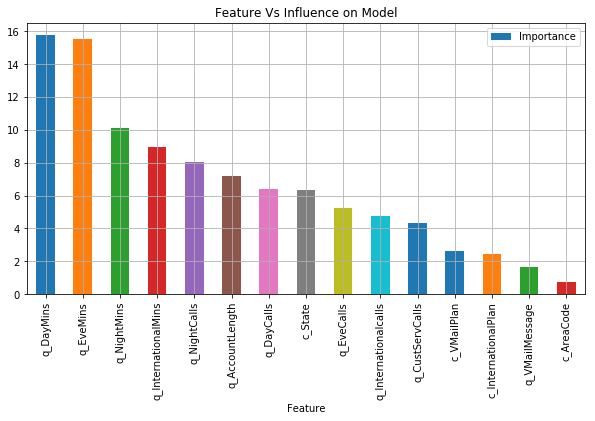

In [104]:
FeatureImportance.plot(x='Feature',
            y='Importance',
            kind='bar',
            grid=True,
            title="Feature Vs Influence on Model",
            legend = True,
            figsize = (10,5)
            )

In [45]:
# Dump the churn Model
joblib.dump(model,'Churn_model_Trained.ml')

['Churn_model_Trained.ml']